In [1]:
#Libraries for Audio Analysis and Ploting:

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from helpers.wavfilehelper import WavFileHelper


In [4]:
#Set Pahts :

home_path = '/Users/manishatakale/Downloads/mlchallenge/'

os.chdir(home_path)

feat = np.load('feat.npy' , allow_pickle=True)
path = np.load('path.npy' , allow_pickle=True)

print(feat.shape)
print(path.shape)
data = pd.read_csv(home_path + 'train.csv')
data.head()



(105835,)
(105835,)


,path,word
0,8d37d10e7f97ddea2eca9d39a4cf821b4457b041.wav,one
1,9a8f761be3fa0d0a963f5612ba73e68cc0ad11ba.wav,one
2,314cdc39f628bc68d216498b2080bcc7a549a45f.wav,one
3,cc499e63eee4a3bcca48b5b452df04990df83570.wav,one
4,38cdcc4d9432ce4a2fe63e0998dbca91e64b954a.wav,one


In [6]:
print(feat[0])

[[-1.0160675e+01 -1.3804866e+01  9.1880971e-01 ...  1.5415058e+00
   1.1875046e-02 -5.8664594e+00]
 [-9.9697800e+00 -1.3823588e+01 -7.0778362e-02 ...  1.5948311e+00
   4.3481258e-01 -5.1646194e+00]
 [-9.9518738e+00 -1.2771760e+01 -1.2623003e-01 ...  3.4290311e+00
   2.7361808e+00 -6.0621500e+00]
 ...
 [-9.9772453e+00 -1.8227636e+01  5.4514462e-01 ... -2.4311361e+01
  -1.2033378e+01 -3.0492477e+00]
 [-9.8815651e+00 -1.3674727e+01  5.1737971e+00 ... -1.0951551e+01
  -2.6184993e+00  1.5815194e+00]
 [-1.0164914e+01 -1.2636200e+01  4.4198503e+00 ... -5.7269883e+00
   4.0758374e-01 -4.4462643e+00]]


In [3]:
classes = data['word'].unique() 
print(classes)  ## classes into which we want to classify our audio file

['one' 'down' 'dog' 'three' 'forward' 'up' 'yes' 'stop' 'follow' 'seven'
 'left' 'wow' 'eight' 'two' 'right' 'learn' 'no' 'happy' 'nine' 'zero'
 'cat' 'visual' 'off' 'sheila' 'marvin' 'tree' 'four' 'bird' 'bed' 'on'
 'go' 'five' 'six' 'backward' 'house']


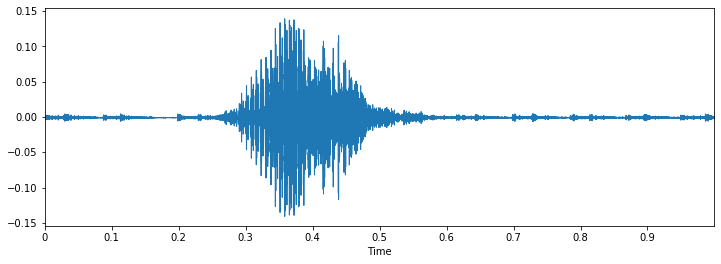

In [6]:
onewav = '/Users/manishatakale/Downloads/mlchallenge/wav/8d37d10e7f97ddea2eca9d39a4cf821b4457b041.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(onewav)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(onewav)

#Unbalanced classes -
house       1922
wow         1917
dog         1908
marvin      1905
bird        1879
happy       1851
cat         1837
sheila      1810
bed         1807
tree        1566
backward    1499
visual      1427
learn       1414
follow      1407
forward     1402

In [4]:
print(data.word.value_counts())

zero        3634
yes         3625
five        3607
seven       3592
no          3536
nine        3526
down        3511
one         3491
go          3478
six         3466
stop        3461
two         3456
on          3449
left        3389
right       3382
eight       3379
off         3343
four        3328
three       3322
up          3298
house       1922
wow         1917
dog         1908
marvin      1905
bird        1879
happy       1851
cat         1837
sheila      1810
bed         1807
tree        1566
backward    1499
visual      1427
learn       1414
follow      1407
forward     1402
Name: word, dtype: int64


In [16]:
wavfilehelper = WavFileHelper()
audiodata = []
for index, row in data.iterrows():
    
    file_name = os.path.join(os.path.abspath('/Users/manishatakale/Downloads/mlchallenge/wav/'))+ '/' + str(row["path"])
    data1 = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data1)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [17]:
print(audiodf.num_channels.value_counts(normalize=True))

1    1.0
Name: num_channels, dtype: float64


In [18]:
print(audiodf.sample_rate.value_counts(normalize=True))

16000    1.0
Name: sample_rate, dtype: float64


In [1]:
audiodf.head()

NameError: name 'audiodf' is not defined

In [21]:
print(audiodf.bit_depth.value_counts(normalize=True))

16    1.0
Name: bit_depth, dtype: float64
